<a href="https://colab.research.google.com/github/RoshanM-18/Intermediate-Deep-Learning-projects-using-Tensorflow-Keras/blob/main/Image_captioning_without_attention.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras

In [ ]:
import os
import zipfile
import re
import pathlib
import random
import math
import string
import pickle

In [ ]:
from tensorflow.keras.applications import ResNet50, VGG16

In [ ]:
os.environ["KAGGLE_CONFIG_DIR"] = "/content/"

In [ ]:
!chmod -600 "/content/kaggle.json"

In [ ]:
!kaggle datasets download -d adityajn105/flickr8k

100% 1.03G/1.04G [00:28<00:00, 29.5MB/s]
100% 1.04G/1.04G [00:28<00:00, 39.5MB/s]


In [ ]:
zip_ref = zipfile.ZipFile("/content/flickr8k.zip")
zip_ref.extractall()
zip_ref.close()

### Converting txt file into a dataframe and downloading resnet model from tensorflow hub

In [ ]:
df = pd.read_csv("captions.txt", sep=",")
df

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...
...,...,...
40450,997722733_0cb5439472.jpg,A man in a pink shirt climbs a rock face
40451,997722733_0cb5439472.jpg,A man is rock climbing high in the air .
40452,997722733_0cb5439472.jpg,A person in a red shirt climbing up a rock fac...
40453,997722733_0cb5439472.jpg,A rock climber in a red shirt .


In [ ]:
resnet_model = ResNet50(include_top=True)
# vgg_model = VGG16(include_top=True)

102981632/102967424 [==============================] - 4s 0us/step


In [ ]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
# vgg_model.summary()

In [ ]:
op_layer_resnet = resnet_model.layers[-2].output
resnet_model_mod = keras.Model(inputs=resnet_model.input, outputs=op_layer_resnet)
resnet_model_mod.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# op_layer_vgg = vgg_model.layers[-2].output
# vgg_model_mod = keras.Model(inputs=vgg_model.input, outputs=op_layer_vgg)
# vgg_model_mod.summary()

### Working with images

In [ ]:
def extract_images(directory):

  # load the model (loaded in the above cell)
  # restructure the model (done in the above cell)

  features = dict()
  count = 0

  for name in os.listdir(directory):
    count+=1
    filename = directory + "/" + name
    # 1. load the image from the file
    image = keras.preprocessing.image.load_img(filename, target_size=(224, 224))
    # 2. convert the image pixels into a np array
    image = keras.preprocessing.image.img_to_array(image)
    # 3. reshape data for the model (converting it into 4d array)
    image = image.reshape((1, 224, 224, image.shape[2]))
    # prepare the image for the VGG model
    image = keras.applications.vgg16.preprocess_input(image)

    # get the features 
    feature = resnet_model_mod.predict(image)
    # get image id
    image_id = name.split(".")[0]

    # store the results
    features[image_id] = feature[0]

    if count%500==0:
      print("Reached a milestone")

    if count==3500:
      break

  return features

In [ ]:
directory = "/content/Images"
features = extract_images(directory)

Reached a milestone
Reached a milestone
Reached a milestone
Reached a milestone
Reached a milestone
Reached a milestone
Reached a milestone


In [ ]:
features

{'975131015_9acd25db9c': array([0.13151766, 0.7513928 , 0.0299224 , ..., 0.552558  , 0.40910247,
        0.33891457], dtype=float32),
 '2676764246_c58205a365': array([0.87395483, 0.9132601 , 0.47001117, ..., 0.6601313 , 1.2526128 ,
        0.6139491 ], dtype=float32),
 '3350671534_2a5d45a961': array([0.69514644, 1.9043934 , 0.46309957, ..., 1.0800874 , 0.82155275,
        0.23249243], dtype=float32),
 '3450874870_c4dcf58fb3': array([0.91586864, 0.5011901 , 0.00244941, ..., 0.14988168, 2.0577552 ,
        0.05950343], dtype=float32),
 '1012212859_01547e3f17': array([0.26615924, 1.8070953 , 0.17910403, ..., 0.1739138 , 1.0895146 ,
        0.00686215], dtype=float32),
 '2899594400_61b4f6c114': array([0.07994108, 0.74684924, 0.16783567, ..., 1.3100078 , 0.0736624 ,
        0.11995963], dtype=float32),
 '1402641725_5e027ecaa7': array([0.00296099, 0.06435771, 0.07776159, ..., 0.7673543 , 1.5893563 ,
        0.8165655 ], dtype=float32),
 '123997871_6a9ca987b1': array([0.38628668, 2.3738594 , 

In [ ]:
z = 20
pic = list(features.keys())[z]
image = features[pic].reshape((1,2048))
image

array([[0.10951318, 0.44423968, 0.30542186, ..., 0.37207538, 0.8899554 ,
        0.08511578]], dtype=float32)

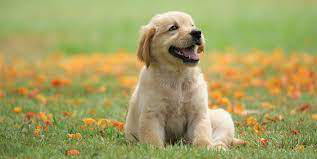

In [ ]:
img = tf.keras.preprocessing.image.load_img("/content/dog.jpg")
img

In [ ]:
image = keras.preprocessing.image.load_img("/content/dog.jpg", target_size=(224, 224))
# 2. convert the image pixels into a np array
image = keras.preprocessing.image.img_to_array(image)
# 3. reshape data for the model (converting it into 4d array)
image = image.reshape((1, 224, 224, image.shape[2]))
# prepare the image for the VGG model
# image /= 255.0
# image = image.astype(np.float32)
image = keras.applications.resnet.preprocess_input(image)

In [ ]:
output = resnet_model_mod.predict(image)
output

array([[0.7332814 , 0.71396655, 0.38479695, ..., 0.5943694 , 0.9002438 ,
        0.01666048]], dtype=float32)

In [ ]:
output.shape

(1, 2048)

In [ ]:
!nvidia-smi -L

GPU 0: Tesla P100-PCIE-16GB (UUID: GPU-5ebce270-26ad-c9d9-5053-54e6b847df0b)


In [ ]:
# features.get("2418191216_82711d5c5c")[0]

### Working with captions

In [ ]:
images_ids = list(features.keys())

In [ ]:
dictionary = {}

for x in images_ids:
  image_name = x+".jpg"
  dictionary[x] = df[df["image"]==image_name]["caption"].values.tolist()

In [ ]:
dictionary

{'1232148178_4f45cc3284': ['A baby girl playing at a park .',
  'A closeup of a child on a playground with adult supervision .',
  'A young boy poses for a picture in front of a playground .',
  'A young girl is smiling in front of the camera at a park .',
  'There is a little blond hair girl with a green sweatshirt and a red shirt playing on a playground .'],
 '337793983_ac5b2e848e': ['a couple men sitting outside of a bar',
  'Men sit and talk at the storefront of a cafe .',
  'There are two people inside , and two men outside , a cafe ; with a tv on in the background .',
  'Two men are sitting at a table outside a coffee shop .',
  'Two men sit outside a cafe painted blue .'],
 '2776029171_5abdd5a22f': ['A little boy is running on the round playing with a little girl .',
  'a young boy running after a young girl on a beach .',
  'Two boys , one naked , one in a skirt , run on the sand .',
  'Two kids chasing each other in the sand .',
  'Two small children running on a beach .'],
 '

In [ ]:
def clean_text(descriptions):

  # translation table for removing punctuations
  table = str.maketrans("", "", string.punctuation)
  for key, value in descriptions.items():
    for i in range(len(value)):
      caption = value[i]

      # tokenize 
      caption = caption.split()
      # convert to lower case
      caption = [x.lower() for x in caption]
      # remove punctuation from each token
      caption = [word.translate(table) for word in caption]
      # remove one letter words
      caption = [x for x in caption if len(x)>1]
      # remove tokens with numbers in them
      caption = [x for x in caption if x.isalpha()]
      # store as a string
      value[i] = "<SOS> " + " ".join(caption) + " <EOS>"

In [ ]:
clean_text(dictionary)

In [ ]:
dictionary

{'1232148178_4f45cc3284': ['<SOS> baby girl playing at park <EOS>',
  '<SOS> closeup of child on playground with adult supervision <EOS>',
  '<SOS> young boy poses for picture in front of playground <EOS>',
  '<SOS> young girl is smiling in front of the camera at park <EOS>',
  '<SOS> there is little blond hair girl with green sweatshirt and red shirt playing on playground <EOS>'],
 '337793983_ac5b2e848e': ['<SOS> couple men sitting outside of bar <EOS>',
  '<SOS> men sit and talk at the storefront of cafe <EOS>',
  '<SOS> there are two people inside and two men outside cafe with tv on in the background <EOS>',
  '<SOS> two men are sitting at table outside coffee shop <EOS>',
  '<SOS> two men sit outside cafe painted blue <EOS>'],
 '2776029171_5abdd5a22f': ['<SOS> little boy is running on the round playing with little girl <EOS>',
  '<SOS> young boy running after young girl on beach <EOS>',
  '<SOS> two boys one naked one in skirt run on the sand <EOS>',
  '<SOS> two kids chasing each 

In [ ]:
def to_vocab(descriptions):

  vocab = []

  for x in descriptions.items():
    for i in x[1]:
      i = i.split()
      for j in i:
        if j in vocab:
          continue
        else:
          vocab.append(j)

  return vocab

In [ ]:
vocab = to_vocab(dictionary)

In [ ]:
len(vocab)

5917

### Splitting into train, test, validation sets

In [ ]:
train = {}
test = {}
val = {}
count = 0

for key, value in dictionary.items():
  count+=1
  if count<=2500:
    train[key] = value
  elif count>=2501 and count<=3000:
    test[key] = value
  else:
    val[key] = value

In [ ]:
len(train), len(test), len(val)

(2500, 500, 500)

In [ ]:
val

{'1057089366_ca83da0877': ['<SOS> boy descends off the end of high diving board <EOS>',
  '<SOS> child jumps off high diving board into the pool <EOS>',
  '<SOS> kid jumps off the diving board and into the swimming pool below <EOS>',
  '<SOS> little kid is jumping off high dive at the pool <EOS>',
  '<SOS> the boy is jumping off high diving board into the pool <EOS>'],
 '1079274291_9aaf896cc1': ['<SOS> little boy sticks his tongue out for the camera another boy looks on <EOS>',
  '<SOS> two boys make faces <EOS>',
  '<SOS> two young boys are looking at the camera one smiling the other sticking his tongue out <EOS>',
  '<SOS> two young boys look up at the camera as one sticks out his tongue <EOS>',
  '<SOS> two young boys making silly faces <EOS>'],
 '109202756_b97fcdc62c': ['<SOS> woman dressed in blue jacket and blue jeans rides brown horse near frozen lake and snowcovered mountain <EOS>',
  '<SOS> woman in blue jacket rides brown pony near water <EOS>',
  '<SOS> woman rides horse nea

### Tokenization and numeric mapping

In [ ]:
clean_descriptions = []

for key, values in train.items():
  for x in values:
    clean_descriptions.append(x)

In [ ]:
clean_descriptions

['<SOS> baby girl playing at park <EOS>',
 '<SOS> closeup of child on playground with adult supervision <EOS>',
 '<SOS> young boy poses for picture in front of playground <EOS>',
 '<SOS> young girl is smiling in front of the camera at park <EOS>',
 '<SOS> there is little blond hair girl with green sweatshirt and red shirt playing on playground <EOS>',
 '<SOS> couple men sitting outside of bar <EOS>',
 '<SOS> men sit and talk at the storefront of cafe <EOS>',
 '<SOS> there are two people inside and two men outside cafe with tv on in the background <EOS>',
 '<SOS> two men are sitting at table outside coffee shop <EOS>',
 '<SOS> two men sit outside cafe painted blue <EOS>',
 '<SOS> little boy is running on the round playing with little girl <EOS>',
 '<SOS> young boy running after young girl on beach <EOS>',
 '<SOS> two boys one naked one in skirt run on the sand <EOS>',
 '<SOS> two kids chasing each other in the sand <EOS>',
 '<SOS> two small children running on beach <EOS>',
 '<SOS> peop

In [ ]:
# clean_descriptions_val = []

# for key, values in val.items():
#   for x in values:
#     clean_descriptions_val.append(x)

In [ ]:
# clean_test = []

# for key, values in test.items():
#   for x in values:
#     clean_test.append(x)

In [ ]:
# len(clean_descriptions), len(clean_descriptions_val), len(clean_test)

In [ ]:
tokenizer = keras.preprocessing.text.Tokenizer(oov_token="OOV")
tokenizer.fit_on_texts(clean_descriptions)

In [ ]:
print(tokenizer.word_index)

{'OOV': 1, 'sos': 2, 'eos': 3, 'in': 4, 'the': 5, 'on': 6, 'is': 7, 'and': 8, 'dog': 9, 'with': 10, 'man': 11, 'of': 12, 'two': 13, 'white': 14, 'black': 15, 'boy': 16, 'are': 17, 'woman': 18, 'to': 19, 'girl': 20, 'wearing': 21, 'at': 22, 'people': 23, 'brown': 24, 'young': 25, 'water': 26, 'red': 27, 'an': 28, 'running': 29, 'his': 30, 'dogs': 31, 'through': 32, 'blue': 33, 'playing': 34, 'while': 35, 'grass': 36, 'down': 37, 'little': 38, 'standing': 39, 'ball': 40, 'shirt': 41, 'jumping': 42, 'three': 43, 'snow': 44, 'person': 45, 'child': 46, 'over': 47, 'field': 48, 'holding': 49, 'front': 50, 'green': 51, 'large': 52, 'sitting': 53, 'one': 54, 'small': 55, 'up': 56, 'children': 57, 'yellow': 58, 'her': 59, 'by': 60, 'group': 61, 'into': 62, 'beach': 63, 'air': 64, 'jumps': 65, 'walking': 66, 'men': 67, 'runs': 68, 'for': 69, 'mouth': 70, 'near': 71, 'from': 72, 'its': 73, 'stands': 74, 'as': 75, 'another': 76, 'bike': 77, 'riding': 78, 'looking': 79, 'outside': 80, 'girls': 81, 

In [ ]:
len(tokenizer.word_index)

4997

In [ ]:
max_length = 0

for i,x in enumerate(clean_descriptions):
  if len([word for word in x.split()])>max_length:
    max_length = len([word for word in x.split()])
    print(i, max_length)

0 7
1 10
2 11
3 13
4 17
7 18
99 24
451 25
1349 27
1415 28
5157 29
7169 31


In [ ]:
max_length

31

### create input window pipeline for the model

In [ ]:
# create sequences of images, input sequences and output words for an image
def create_sequences(tokenizer, max_length, desc_list, image):

  x1 = [] # image
  x2 = [] # sequence data
  y = [] # sequence target 

  # Image 
  # A boy is standing below a mountain
  # 1sr -> A
  # output -> bou

  # 2nd -> a boy
  # output -> is

  # 3rd -> a boy is
  # ouput -> standing

  
  # 7th -> a bo

  for key, value in desc_list.items():
    if key in image.keys():
      for seq in desc_list.get(key):
        # encode the sequence
        sequence = tokenizer.texts_to_sequences([seq])[0]
        for i in range(1, len(sequence)):
          # split it into input and output pairs
          in_seq, out_seq = sequence[:i], sequence[i]
          # pad input sequence
          in_seq = keras.preprocessing.sequence.pad_sequences([in_seq], maxlen=max_length, padding="post")[0]

          [1 0 0 0 0 0 0 ]
          [1 2 0 0 ]
          [1 2 3 0 0 0 ]

          # encode output sequence
          out_seq = tf.keras.utils.to_categorical([out_seq], num_classes=len(tokenizer.word_index)+1)[0]

          [1]

          x1.append(image.get(key))
          x2.append(in_seq)
          y.append(out_seq)
    else:
      continue

  return np.array(x1), np.array(x2), np.array(y)

In [ ]:
X1, X2, y = create_sequences(tokenizer, max_length, train, features)

In [ ]:
train_image_captions_input = tf.data.Dataset.from_tensor_slices((X1, X2))
train_captions_output = tf.data.Dataset.from_tensor_slices(y)
train_dataset = tf.data.Dataset.zip((train_image_captions_input, train_captions_output))

train_image_captions_dataset = train_dataset.batch(64).prefetch(tf.data.AUTOTUNE)

In [ ]:
X1, X2, y = create_sequences(tokenizer, max_length, val, features)

In [ ]:
val_image_captions_input = tf.data.Dataset.from_tensor_slices((X1, X2))
val_captions_output = tf.data.Dataset.from_tensor_slices(y)
val_dataset = tf.data.Dataset.zip((val_image_captions_input, val_captions_output))

val_image_captions_dataset = val_dataset.batch(64).prefetch(tf.data.AUTOTUNE)

In [ ]:
X1, X2, y = create_sequences(tokenizer, max_length, test, features)

In [ ]:
test_image_captions_input = tf.data.Dataset.from_tensor_slices((X1, X2))
test_captions_output = tf.data.Dataset.from_tensor_slices(y)
test_dataset = tf.data.Dataset.zip((test_image_captions_input, test_captions_output))

test_image_captions_dataset = test_dataset.batch(64).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_image_captions_dataset, test_image_captions_dataset, val_image_captions_dataset

(<PrefetchDataset shapes: (((None, 4096), (None, 31)), (None, 4998)), types: ((tf.float32, tf.int32), tf.float32)>,
 <PrefetchDataset shapes: (((None, 4096), (None, 31)), (None, 4998)), types: ((tf.float32, tf.int32), tf.float32)>,
 <PrefetchDataset shapes: (((None, 4096), (None, 31)), (None, 4998)), types: ((tf.float32, tf.int32), tf.float32)>)

### Building a deep learning model

In [ ]:
image_input = keras.layers.Input(shape=(4096,))
image_dense = keras.layers.Dense(128, activation="relu")(image_input)
rv = keras.layers.RepeatVector(max_length)(image_dense)
image_model = keras.Model(inputs=image_input, outputs=rv)
# print(image_model.summary())

text_input = keras.layers.Input(shape=(max_length,))
embedding = keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=128, mask_zero=True)(text_input)
lstm = keras.layers.LSTM(256, return_sequences=True)(embedding)
time_dist = keras.layers.TimeDistributed(keras.layers.Dense(128))(lstm)
text_model = keras.Model(inputs=text_input, outputs=time_dist)
# print(text_model.summary())

add = keras.layers.Concatenate()([image_model.output, text_model.output])
dense = keras.layers.GRU(128, return_sequences=False)(add)
x = keras.layers.Dense(128, activation="relu")(dense)
output = keras.layers.Dense(len(tokenizer.word_index)+1, activation="softmax")(x)

model = keras.Model(inputs=[image_model.input, text_model.input], outputs=output)

In [ ]:
model.summary()  

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_8 (InputLayer)           [(None, 31)]         0           []                               
                                                                                                  
 input_7 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 31, 128)      639744      ['input_8[0][0]']                
                                                                                                  
 dense_9 (Dense)                (None, 128)          524416      ['input_7[0][0]']                
                                                                                           

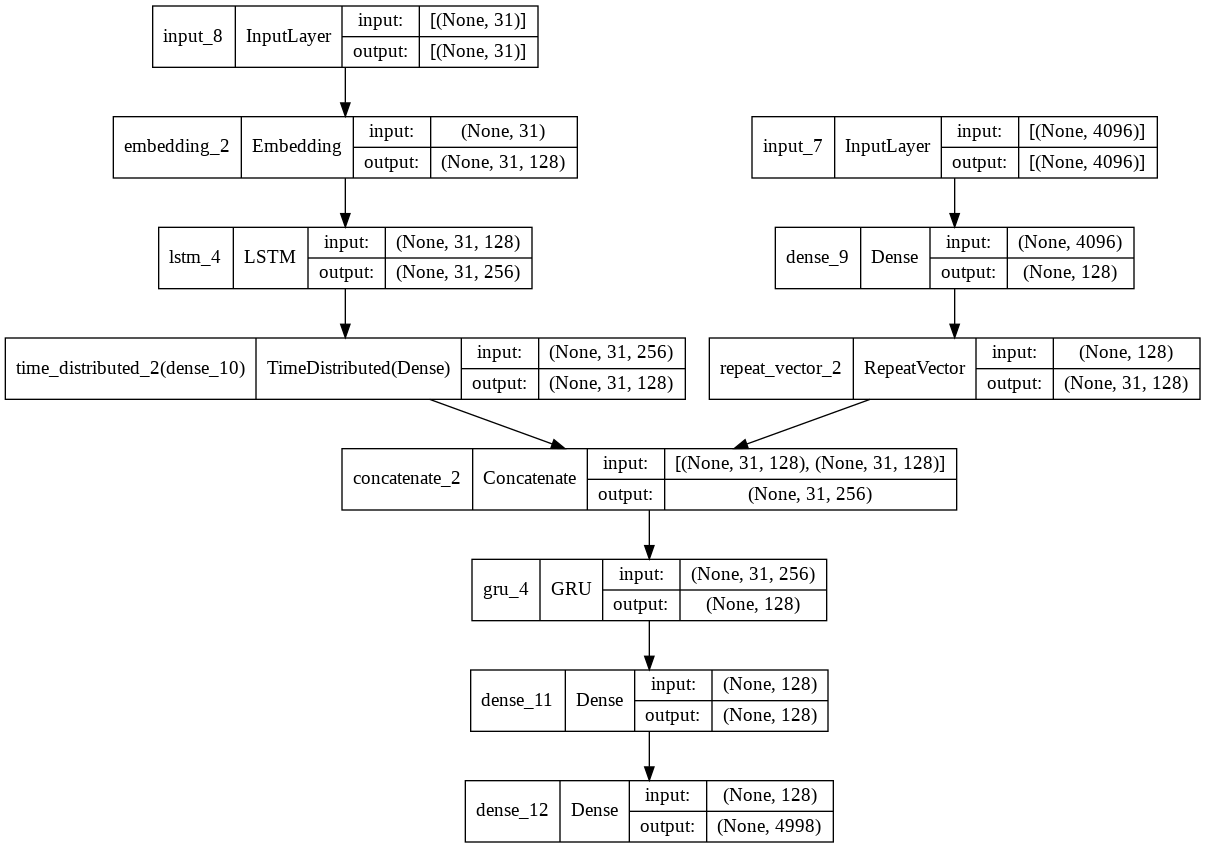

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(loss=keras.losses.CategoricalCrossentropy(), metrics=["accuracy"], optimizer=keras.optimizers.Adam(learning_rate=0.001))

In [ ]:
history = model.fit(train_image_captions_dataset, epochs=50, steps_per_epoch=len(train_image_captions_dataset),
                    validation_data=val_image_captions_dataset, validation_steps=len(val_image_captions_dataset))

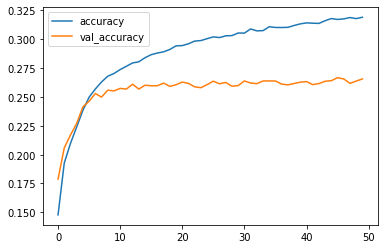

In [ ]:
pd.DataFrame(history.history)[["accuracy", "val_accuracy"]].plot()

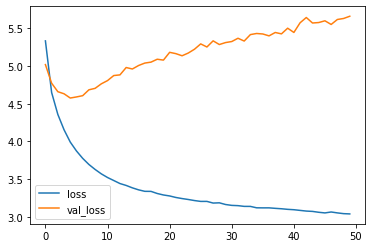

In [ ]:
pd.DataFrame(history.history)[["loss", "val_loss"]].plot()

Looks like we ran into another trouble. There was progress and it seems things would improve now. Lets give it another try shall we?

In [ ]:
import pickle

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
features = pickle.load(open("images1.pkl", "rb"))
model = tf.keras.models.load_model('/content/checkpoint_model_18.h5')
# images = "Images/"
max_length = 39
words_to_index = pickle.load(open("words.pkl", "rb"))
index_to_words = pickle.load(open("words1.pkl", "rb"))

In [ ]:
def Image_Caption(picture):
    in_text = '<start>'
    for i in range(max_length):
        sequence = [words_to_index[w] for w in in_text.split() if w in words_to_index]
        sequence = pad_sequences([sequence], maxlen=max_length)
        yhat = model.predict([picture], verbose=0)
        yhat = np.argmax(yhat)
        word = index_to_words[yhat]
        in_text += ' ' + word
        if word == '<end>':
            break
    final = in_text.split()
    final = final[1:-1]
    final = ' '.join(final)
    return final

[[0.6120736  0.45354623 0.20810366 ... 1.7978235  0.1661435  0.36710727]]


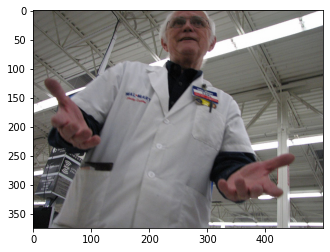

ValueError: ignored

In [ ]:
z = 20
pic = list(features.keys())[z]
image = features[pic].reshape((1,2048))
x = plt.imread(os.path.join("Images/", pic))
print(image)
plt.imshow(x)
plt.show()
print("Caption:", Image_Caption(image))